2 つの CSV ファイルを読み込み、各ルールにおける precision（適合率）と recall（再現率）を計算


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# CSVファイルの読み込み
gemini_df = pd.read_csv('../../data/test/sampling_check_by_gemini.csv')
human_df = pd.read_csv('../../data/test/sampling_check_by_human.csv')

In [17]:
# TP, TN, FP, FNの計算と表示
def calculate_metrics(gemini_df, human_df):
    # 評価結果を格納する辞書
    metrics = {}

    # 対象となるルールを抽出（rule1 ~ rule31）
    rules = [f'rule{i}' for i in range(1, 32)]

    # 各ルールについて計算
    for rule in rules:
        # True Positives (TP): Geminiと人間判定が両方 "yes"
        tp = ((gemini_df[rule] == 'yes') & (human_df[rule] == 'yes')).sum()
        
        # False Positives (FP): Geminiが "yes" だが、人間判定が "no"
        fp = ((gemini_df[rule] == 'yes') & (human_df[rule] == 'no')).sum()
        
        # False Negatives (FN): Geminiが "no" だが、人間判定が "yes"
        fn = ((gemini_df[rule] == 'no') & (human_df[rule] == 'yes')).sum()
        
        # True Negatives (TN): Geminiと人間判定が両方 "no"
        tn = ((gemini_df[rule] == 'no') & (human_df[rule] == 'no')).sum()
        
        # Precision（適合率）
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        
        # Recall（再現率）
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        
        # F1スコア
        f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        # Accuracy（正確度）
        accuracy = (tp + tn) / (tp + fp + fn + tn) if (tp + fp + fn + tn) > 0 else 0
        
        # 辞書に結果を保存
        metrics[rule] = {
            'TP': tp,
            'FP': fp,
            'FN': fn,
            'TN': tn,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1_score,
            'Accuracy': accuracy
        }

    # 結果をDataFrameに変換して表示
    metrics_df = pd.DataFrame(metrics).T
    metrics_df.index.name = 'Rule'
    metrics_df.reset_index(inplace=True)

    # Accuracyの平均を計算
    accuracy_mean = metrics_df['Accuracy'].mean()
    print(f"\n全ルールのAccuracyの平均: {accuracy_mean:.4f}")

    # 表示
    print(metrics_df)

# 関数を実行して確認
calculate_metrics(gemini_df, human_df)


全ルールのAccuracyの平均: 0.7354
      Rule    TP    FP    FN    TN  Precision    Recall  F1 Score  Accuracy
0    rule1  61.0  30.0   1.0   5.0   0.670330  0.983871  0.797386  0.680412
1    rule2  22.0  35.0   8.0  32.0   0.385965  0.733333  0.505747  0.556701
2    rule3   8.0   8.0  12.0  69.0   0.500000  0.400000  0.444444  0.793814
3    rule4  34.0  19.0   8.0  36.0   0.641509  0.809524  0.715789  0.721649
4    rule5  85.0   5.0   6.0   1.0   0.944444  0.934066  0.939227  0.886598
5    rule6  10.0   3.0  40.0  44.0   0.769231  0.200000  0.317460  0.556701
6    rule7  60.0  15.0  15.0   7.0   0.800000  0.800000  0.800000  0.690722
7    rule8  44.0   3.0  29.0  21.0   0.936170  0.602740  0.733333  0.670103
8    rule9  19.0  28.0   1.0  49.0   0.404255  0.950000  0.567164  0.701031
9   rule10  12.0   4.0  23.0  58.0   0.750000  0.342857  0.470588  0.721649
10  rule11  82.0  12.0   0.0   3.0   0.872340  1.000000  0.931818  0.876289
11  rule12  27.0  38.0   0.0  32.0   0.415385  1.000000  0.586

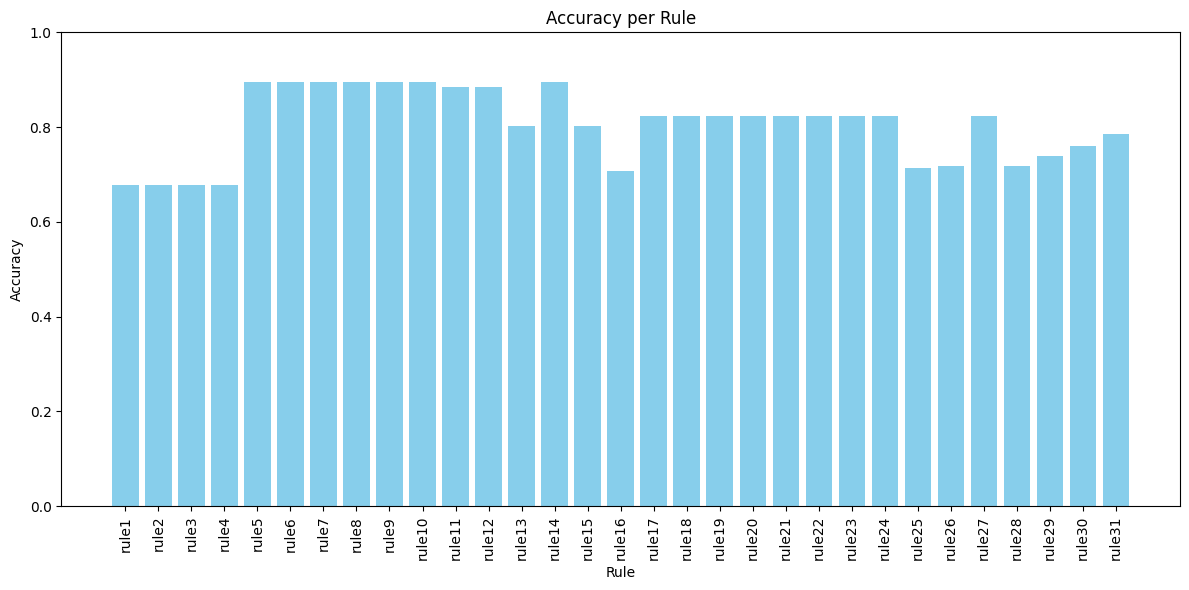

In [18]:
# Accuracyの棒グラフを作成
plt.figure(figsize=(12, 6))
plt.bar(metrics_df['Rule'], metrics_df['Accuracy'], color='skyblue')
plt.xlabel('Rule')
plt.ylabel('Accuracy')
plt.title('Accuracy per Rule')
plt.xticks(rotation=90)
plt.ylim(0, 1)  # Accuracyの範囲は0〜1
plt.tight_layout()
plt.show()


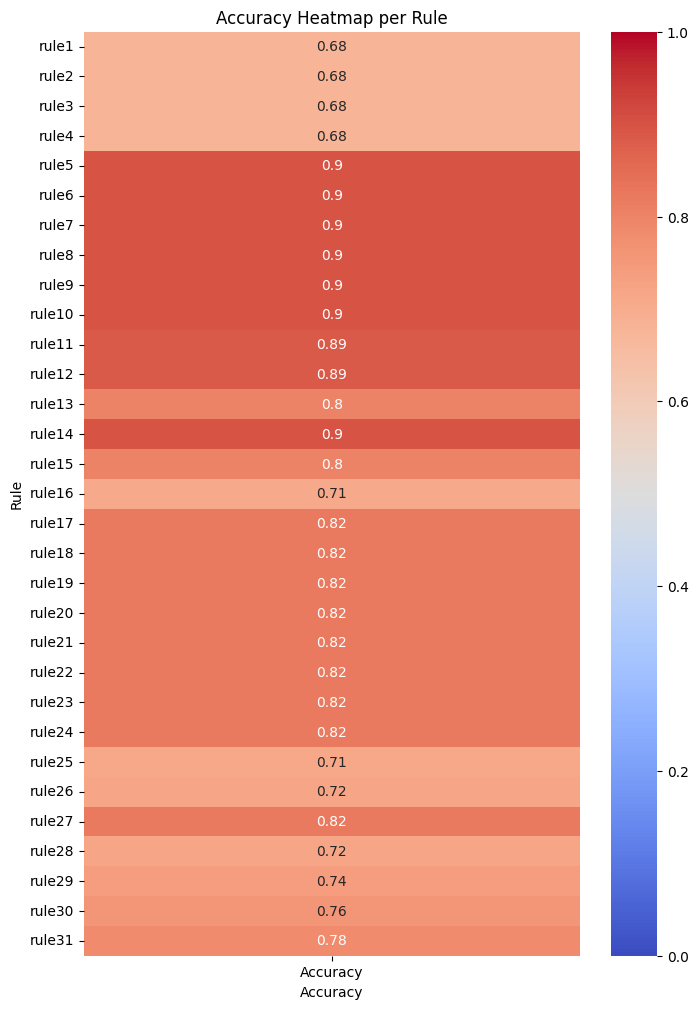

In [19]:
import seaborn as sns

# データフレームを加工してヒートマップ用の形式に変換
accuracy_df = metrics_df[['Rule', 'Accuracy']].set_index('Rule')

# ヒートマップの描画
plt.figure(figsize=(8, 12))
sns.heatmap(accuracy_df, annot=True, cmap='coolwarm', cbar=True, vmin=0, vmax=1)
plt.title('Accuracy Heatmap per Rule')
plt.xlabel('Accuracy')
plt.ylabel('Rule')
plt.show()


/Volumes/Macintosh HD - Data 1/Users/quandomac1/Project/PTL1/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Volumes/Macintosh HD - Data 1/Users/quandomac1/Project/PTL1/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Volumes/Macintosh HD - Data 1/Users/quandomac1/Project/PTL1/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


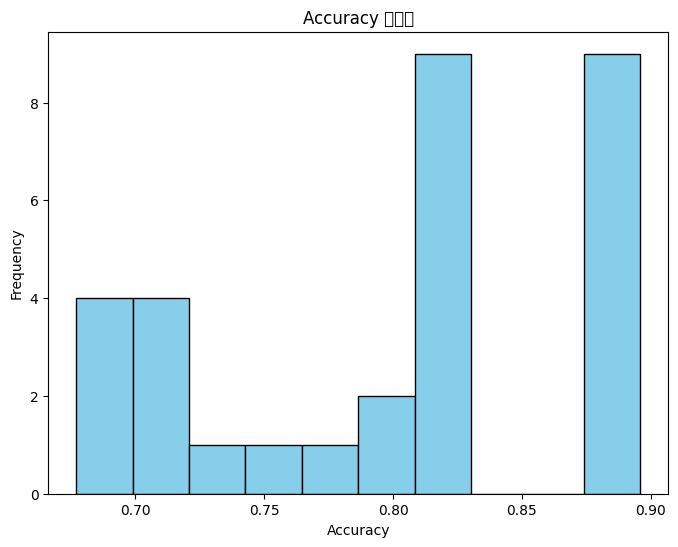

In [20]:
# Accuracyのヒストグラムを作成
plt.figure(figsize=(8, 6))
plt.hist(metrics_df['Accuracy'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Accuracy の分布')
plt.show()
